### Melhorias RF

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Carregando dados dos poços:

Foi criado um dicionario em que cada uma de suas chaves (keys) é um poço (pandas dataframe).

In [137]:
dict= {}
vect = [1,4,5,10,11,12,14,15]

for i in vect:
    mud_i = pd.read_csv(f'./Base/MUD_LOG_{str(i)}.csv')
    mud_i = mud_i.assign(mud=i)
    dict[f"mud_{i}"] = mud_i


dict['mud_10'].head()

,DEPT,DVER,BDIA,ROPA,HKLA,HKLX,WOBA,TQA,TQX,RPMA,...,IBTA,NBTA,IPNA,NPNA,C1C2,C1C3,C1C4,C1C5,LITH,mud
0,147,147.0,8.5,1.43,84.67,87.92,1.00,1.15,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,148,148.0,8.5,1.26,84.67,87.92,0.21,1.25,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,149,149.0,8.5,1.65,84.67,87.92,1.00,1.35,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,150,150.0,8.5,1.42,84.67,87.92,1.32,1.34,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,151,151.0,8.5,1.58,84.67,87.92,2.76,1.25,17.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [138]:
dict['mud_1'].head()

,DEPT,DVER,BDIA,ROPA,HKLA,HKLX,WOBA,TQA,TQX,RPMA,...,IBTA,NBTA,IPNA,NPNA,C1C2,C1C3,C1C4,C1C5,LITH,mud
0,145,145.0,36.0,21.83,36.04,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,146,146.0,36.0,29.00,35.28,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,147,147.0,36.0,41.00,35.29,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,148,148.0,36.0,20.00,35.32,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,149,149.0,36.0,15.00,35.29,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### Features



Reduzir as colunas para apenas as listadas abaixo:

DEPT	M	Depth</br>
BDIA 	INCH	Bit Diameter</br>
ROPA 	M/HR	Rate of Penetration, Average</br>
HKLA	TON	Average Hookload </br>
WOBA	TON	Weight on Bit - average</br>
TQA	KNM	Torque A, average</br>
RPMB	RPM	Average Bit RPM</br>
SPPA	BAR	Average Pump Pressure - Stand Pipe</br>
MFIA	L/MN	Mud Flow In - Average</br>
MDIA	G/CC	Mud Density In - Average</br>
MTIA	DEGC	Mud Temperature In - Average (Graus Celsius)</br>
LITH	....	Lithology</br>

In [139]:
dict['mud_11'].rename(columns={'TDEP': 'DEPT'}, inplace=True)

In [140]:
selected_features = ['DEPT', 'BDIA', 'ROPA', 'HKLA', 'WOBA', 'TQA','RPMB','SPPA','MFIA', 'MDIA','MTIA','LITH','mud']
for i in vect:
    dict[f'mud_{i}'] = dict[f'mud_{i}'][selected_features]

In [141]:
dict['mud_4'].head()

,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
0,145,36.0,21.83,36.04,0.0,0.0,0.0,5.6,604.00,NaN,0.0,NaN,4
1,146,36.0,29.00,35.28,0.0,0.0,0.0,6.0,604.15,NaN,0.0,NaN,4
2,147,36.0,41.00,35.29,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
3,148,36.0,20.00,35.32,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
4,149,36.0,15.00,35.29,0.0,0.0,0.0,8.0,604.15,NaN,0.0,NaN,4


In [142]:
print(f'Número de poços: {len(dict)}')

Número de poços: 8


### Estabelecendo condições simulando o Pré-Sal


Apenas limestone (700) e diâmetros de broca 12.25 e 8.5.

In [143]:
dict['mud_4'].head()

,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
0,145,36.0,21.83,36.04,0.0,0.0,0.0,5.6,604.00,NaN,0.0,NaN,4
1,146,36.0,29.00,35.28,0.0,0.0,0.0,6.0,604.15,NaN,0.0,NaN,4
2,147,36.0,41.00,35.29,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
3,148,36.0,20.00,35.32,0.0,0.0,0.0,7.0,604.15,NaN,0.0,NaN,4
4,149,36.0,15.00,35.29,0.0,0.0,0.0,8.0,604.15,NaN,0.0,NaN,4


In [144]:
diameters = dict['mud_4']['BDIA'].unique()
diameters

array([36.  , 17.5 , 12.25,  8.5 ])

In [145]:
liths = dict['mud_4']['LITH'].unique()
liths

array([   nan, 600.  , 600.39, 600.17, 600.32, 300.  , 700.  , 800.  ,
       700.17, 600.38, 400.17, 300.23, 400.  ])

Deixando apenas limestone, divididos entre brocas 8.5 e 12.25

In [146]:
dict_lime_1225 = {}
dict_lime_85 = {}


for i in vect:
    dict[f'mud_{i}'] = dict[f'mud_{i}'].dropna(subset=['LITH'])
    dict_lime_1225[f'mud_{i}'] = dict[f'mud_{i}'][ np.logical_and(dict[f'mud_{i}']['BDIA'] == 12.25 , dict[f'mud_{i}']['LITH'].astype(int) == 700)]
    dict_lime_85[f'mud_{i}'] = dict[f'mud_{i}'][ np.logical_and(dict[f'mud_{i}']['BDIA'] == 8.5 , dict[f'mud_{i}']['LITH'].astype(int) == 700)]

In [147]:
print(len(dict_lime_85))

8


In [148]:
dict_lime_1225.keys()

dict_keys(['mud_1', 'mud_4', 'mud_5', 'mud_10', 'mud_11', 'mud_12', 'mud_14', 'mud_15'])

In [149]:
# Juntando todos os de 1225 em um unico df:

df_all_1225 = pd.DataFrame()
for i in vect:
    df_all_1225 = pd.concat([df_all_1225, dict_lime_1225[f'mud_{i}']])

print('N de Features: ', df_all_1225.shape[1])
df_all_1225.head()

N de Features:  13


,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
2596,2741,12.25,19.86,158.58,8.00,23.79,169.0,213.1,3517.33,1.41,16.49,700.0,1
2597,2742,12.25,10.46,158.63,7.96,22.66,167.0,212.5,3517.75,1.41,16.49,700.0,1
2598,2743,12.25,10.37,158.35,8.24,23.19,167.0,212.1,3517.46,1.41,16.49,700.0,1
2599,2744,12.25,3.92,161.31,5.28,18.37,178.0,211.6,3517.35,1.41,16.47,700.0,1
2600,2745,12.25,4.11,160.36,6.23,18.34,179.0,211.0,3517.36,1.41,16.44,700.0,1


In [150]:
# Juntnado todos os de 85 em um unico df:

df_all_85 = pd.DataFrame()
for i in vect:
    df_all_85 = pd.concat([df_all_85, dict_lime_85[f'mud_{i}']])

print('N de Features: ', df_all_85.shape[1])
df_all_85.head()

N de Features:  13


,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
2626,2771,8.5,38.20,145.42,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,700.0,1
2627,2772,8.5,9.32,142.54,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,700.0,1
2628,2773,8.5,4.35,142.14,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,700.0,1
2629,2774,8.5,5.45,142.26,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,700.0,1
2630,2775,8.5,1.23,142.29,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,700.0,1


### Função de erro

In [151]:
import pandas as pd
import numpy as np

erros = pd.DataFrame(columns=['Model', 'Features Removidas', 'Mean Absolute Error', 'Mean Absolute Percentage Error', 'R2 Score', 'Mean Squared Error', 'Root Mean Squared Error'])
erros.head()

,Model,Features Removidas,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error


In [152]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error

def error_report(y_test, previsoes, model_name, remocoes, erros):
    mae = mean_absolute_error(y_test, previsoes)
    mape = mean_absolute_percentage_error(y_test, previsoes)
    r2 = r2_score(y_test, previsoes)
    mse = mean_squared_error(y_test, previsoes)
    rmse = np.sqrt(mse)

    erros.loc[len(erros.index)]= [model_name, remocoes, mae, mape,r2, mse, rmse]

    print('Mean Absolute Error:', mae)
    print('Mean Absolute percentage Error', mape)
    print('R2 Score', r2)
    print('Root Mean Squared Error', rmse)

### Preparando os dados

In [153]:
X = df_all_85.drop(['ROPA', 'LITH'], axis=1)
y = df_all_85['ROPA']


In [154]:
df_all_85.head()

,DEPT,BDIA,ROPA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,LITH,mud
2626,2771,8.5,38.20,145.42,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,700.0,1
2627,2772,8.5,9.32,142.54,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,700.0,1
2628,2773,8.5,4.35,142.14,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,700.0,1
2629,2774,8.5,5.45,142.26,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,700.0,1
2630,2775,8.5,1.23,142.29,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,700.0,1


In [155]:
X.head()

,DEPT,BDIA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,mud
2626,2771,8.5,145.42,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,1
2627,2772,8.5,142.54,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,1
2628,2773,8.5,142.14,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,1
2629,2774,8.5,142.26,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,1
2630,2775,8.5,142.29,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,1


In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)

### Random Forest: Testes iniciais

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [158]:
rf_model = RandomForestRegressor(random_state=9,max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)

In [159]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=9)

In [160]:
y_pred = rf_model.predict(X_test)

error_report(y_test, y_pred, 'Random Forest Regressor', 'All features', erros)
erros.head()

Mean Absolute Error: 1.3368218181818177
Mean Absolute percentage Error 0.0975972939316385
R2 Score 0.9235367476224198
Root Mean Squared Error 2.57326947219786


,Model,Features Removidas,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,All features,1.336822,0.097597,0.923537,6.621716,2.573269


In [161]:
# erros = erros.drop(2)
erros.head()

,Model,Features Removidas,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,All features,1.336822,0.097597,0.923537,6.621716,2.573269


### Medida de importância de features pelo próprio SKlearn

In [162]:
import time

import numpy as np

start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.008 seconds


In [163]:
feature_names = X.columns.to_list()

feature_names

['DEPT',
 'BDIA',
 'HKLA',
 'WOBA',
 'TQA',
 'RPMB',
 'SPPA',
 'MFIA',
 'MDIA',
 'MTIA',
 'mud']

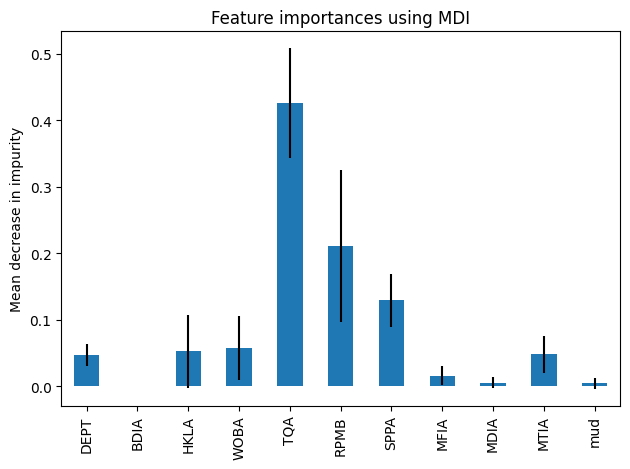

In [164]:
import pandas as pd

forest_importances = pd.Series(importances, index= feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### SHAP: Random Forest

In [165]:
import shap

In [166]:
background_data_summary = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(rf_model.predict, background_data_summary)

In [167]:
shap_values = explainer.shap_values(X_test)

100%|██████████| 440/440 [03:45<00:00,  1.95it/s]


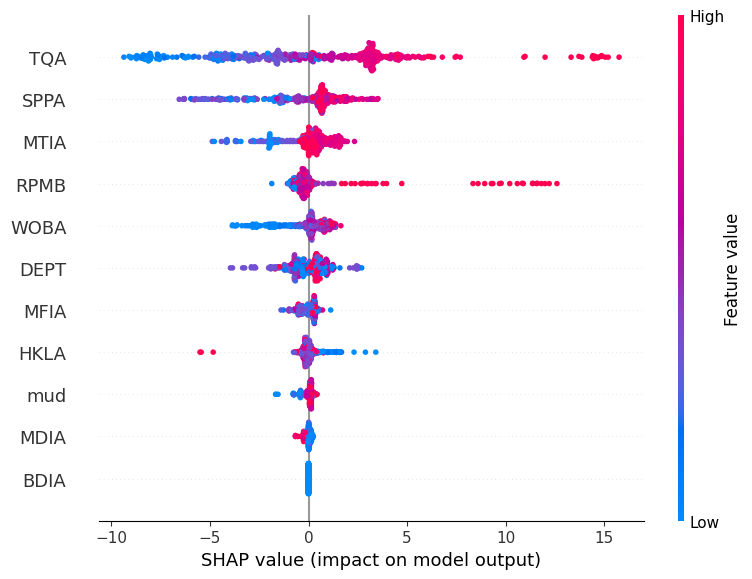

In [169]:
shap.summary_plot(shap_values, X_test, feature_names=feature_names )

### Identificação da Feature com o Impacto Mais Negativo
<ul>
    <li><strong>BDIA</strong>: Valores shapley próximos de 0, não representa grandes impactos </li>
    <li><strong>HKLA</strong>: Também tem uma concentração notável de valores SHAP negativos.</li>
    <li><strong>MFIA</strong>: Vários valores SHAP negativos significativos.</li>
</ul>

In [100]:
shap_values

array([[ 0.17317567,  0.        , -0.20350762, ...,  0.06101776,
        -0.30305374,  0.12779409],
       [ 0.59133451,  0.        , -0.10955226, ..., -0.25109288,
        -0.82517136, -0.38149066],
       [-0.61752864,  0.        ,  0.05282463, ..., -0.05787462,
         0.32663216, -0.08034987],
       ...,
       [-1.08912354,  0.        , -0.05066253, ...,  0.00963218,
         1.08386722,  0.05582414],
       [ 0.6573985 ,  0.        , -0.13055216, ...,  0.01497127,
         1.57641963,  0.09866938],
       [ 0.5587288 ,  0.        , -0.23882175, ..., -0.04797325,
        -0.27353346,  0.14007051]])

### Random Forest Excluindo BDIA

In [170]:
X = df_all_85.drop(['ROPA', 'LITH', 'BDIA'], axis=1)
y = df_all_85['ROPA']

In [171]:
X.head()

,DEPT,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,mud
2626,2771,145.42,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,1
2627,2772,142.54,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,1
2628,2773,142.14,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,1
2629,2774,142.26,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,1
2630,2775,142.29,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,1


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)
rf_model = RandomForestRegressor(random_state=9,max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)


In [173]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=9)

In [174]:
y_pred = rf_model.predict(X_test)

error_report(y_test, y_pred, 'Random Forest Regressor', '-[BDIA]}', erros)
erros.head()



Mean Absolute Error: 1.3403759090909089
Mean Absolute percentage Error 0.09893877509245391
R2 Score 0.9245856596973596
Root Mean Squared Error 2.555558650596061


,Model,Features Removidas,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,All features,1.336822,0.097597,0.923537,6.621716,2.573269
1,Random Forest Regressor,-[BDIA]},1.340376,0.098939,0.924586,6.530880,2.555559


In [175]:
erros.head()

,Model,Features Removidas,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,All features,1.336822,0.097597,0.923537,6.621716,2.573269
1,Random Forest Regressor,-[BDIA]},1.340376,0.098939,0.924586,6.530880,2.555559


### Random Forest Excluindo HKLA

In [176]:
X = df_all_85.drop(['ROPA', 'LITH', 'HKLA'], axis=1)
y = df_all_85['ROPA']

X.head()

,DEPT,BDIA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,mud
2626,2771,8.5,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,1
2627,2772,8.5,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,1
2628,2773,8.5,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,1
2629,2774,8.5,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,1
2630,2775,8.5,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,1


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)
rf_model = RandomForestRegressor(random_state=9,max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)


In [178]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=9)

In [179]:
y_pred = rf_model.predict(X_test)

error_report(y_test, y_pred, 'Random Forest Regressor', '-[HKLA]}', erros)
erros.head()

Mean Absolute Error: 1.3564822727272727
Mean Absolute percentage Error 0.10086821680939255
R2 Score 0.9220323216516638
Root Mean Squared Error 2.598460896114537


,Model,Features Removidas,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,All features,1.336822,0.097597,0.923537,6.621716,2.573269
1,Random Forest Regressor,-[BDIA]},1.340376,0.098939,0.924586,6.530880,2.555559
2,Random Forest Regressor,-[HKLA]},1.356482,0.100868,0.922032,6.751999,2.598461


### Random Forest Excluindo MFIA

In [181]:
X = df_all_85.drop(['ROPA', 'LITH','MFIA'], axis=1)
y = df_all_85['ROPA']

X.head()

,DEPT,BDIA,HKLA,WOBA,TQA,RPMB,SPPA,MDIA,MTIA,mud
2626,2771,8.5,145.42,2.50,11.44,29.00,129.9,1.43,16.30,1
2627,2772,8.5,142.54,5.38,13.08,29.00,140.7,1.43,16.51,1
2628,2773,8.5,142.14,5.77,13.48,30.00,140.8,1.43,16.53,1
2629,2774,8.5,142.26,5.66,13.82,30.00,141.9,1.43,16.56,1
2630,2775,8.5,142.29,2.44,11.79,29.96,205.2,1.42,16.67,1


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)
rf_model = RandomForestRegressor(random_state=9,max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)


In [183]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=9)

In [184]:
y_pred = rf_model.predict(X_test)

error_report(y_test, y_pred, 'Random Forest Regressor', '-[MFIA]}', erros)
erros.head()

Mean Absolute Error: 1.3411331818181815
Mean Absolute percentage Error 0.09904410627727685
R2 Score 0.9246994507458216
Root Mean Squared Error 2.5536299094889143


,Model,Features Removidas,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,All features,1.336822,0.097597,0.923537,6.621716,2.573269
1,Random Forest Regressor,-[BDIA]},1.340376,0.098939,0.924586,6.530880,2.555559
2,Random Forest Regressor,-[HKLA]},1.356482,0.100868,0.922032,6.751999,2.598461
3,Random Forest Regressor,-[MFIA]},1.341133,0.099044,0.924699,6.521026,2.553630


### Excluindo as 3 de impacto negativo

In [185]:
X = df_all_85.drop(['ROPA', 'LITH','MDIA'], axis=1)
y = df_all_85['ROPA']

X.head()

,DEPT,BDIA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MTIA,mud
2626,2771,8.5,145.42,2.50,11.44,29.00,129.9,1493.88,16.30,1
2627,2772,8.5,142.54,5.38,13.08,29.00,140.7,1493.85,16.51,1
2628,2773,8.5,142.14,5.77,13.48,30.00,140.8,1493.99,16.53,1
2629,2774,8.5,142.26,5.66,13.82,30.00,141.9,1493.92,16.56,1
2630,2775,8.5,142.29,2.44,11.79,29.96,205.2,1947.16,16.67,1


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)
rf_model = RandomForestRegressor(random_state=9,max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)


In [187]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=9)

In [188]:
y_pred = rf_model.predict(X_test)

error_report(y_test, y_pred, 'Random Forest Regressor', '-[MDIA]', erros)
erros.head()

Mean Absolute Error: 1.335078636363636
Mean Absolute percentage Error 0.09978009724669887
R2 Score 0.9259049936808783
Root Mean Squared Error 2.5331059445058566


,Model,Features Removidas,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,All features,1.336822,0.097597,0.923537,6.621716,2.573269
1,Random Forest Regressor,-[BDIA]},1.340376,0.098939,0.924586,6.530880,2.555559
2,Random Forest Regressor,-[HKLA]},1.356482,0.100868,0.922032,6.751999,2.598461
3,Random Forest Regressor,-[MFIA]},1.341133,0.099044,0.924699,6.521026,2.553630
4,Random Forest Regressor,-[MDIA],1.335079,0.099780,0.925905,6.416626,2.533106


### Excluindo a Feature mais importante (WOB)

In [189]:
X = df_all_85.drop(['ROPA', 'LITH','WOBA'], axis=1)
y = df_all_85['ROPA']

X.head()

,DEPT,BDIA,HKLA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,mud
2626,2771,8.5,145.42,11.44,29.00,129.9,1493.88,1.43,16.30,1
2627,2772,8.5,142.54,13.08,29.00,140.7,1493.85,1.43,16.51,1
2628,2773,8.5,142.14,13.48,30.00,140.8,1493.99,1.43,16.53,1
2629,2774,8.5,142.26,13.82,30.00,141.9,1493.92,1.43,16.56,1
2630,2775,8.5,142.29,11.79,29.96,205.2,1947.16,1.42,16.67,1


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)
rf_model = RandomForestRegressor(random_state=9,max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)

In [191]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=9)

In [192]:
y_pred = rf_model.predict(X_test)

error_report(y_test, y_pred, 'Random Forest Regressor', '-[WOB]', erros)
erros.head(10)

Mean Absolute Error: 1.3101868181818177
Mean Absolute percentage Error 0.09104896765503218
R2 Score 0.9188644349243057
Root Mean Squared Error 2.650724040967606


,Model,Features Removidas,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,All features,1.336822,0.097597,0.923537,6.621716,2.573269
1,Random Forest Regressor,-[BDIA]},1.340376,0.098939,0.924586,6.530880,2.555559
2,Random Forest Regressor,-[HKLA]},1.356482,0.100868,0.922032,6.751999,2.598461
3,Random Forest Regressor,-[MFIA]},1.341133,0.099044,0.924699,6.521026,2.553630
4,Random Forest Regressor,-[MDIA],1.335079,0.099780,0.925905,6.416626,2.533106
5,Random Forest Regressor,-[WOB],1.310187,0.091049,0.918864,7.026338,2.650724


### Excluindo segunda Feature mais importante (TQA)

In [193]:
X = df_all_85.drop(['ROPA', 'LITH','TQA'], axis=1)
y = df_all_85['ROPA']

X.head()

,DEPT,BDIA,HKLA,WOBA,RPMB,SPPA,MFIA,MDIA,MTIA,mud
2626,2771,8.5,145.42,2.50,29.00,129.9,1493.88,1.43,16.30,1
2627,2772,8.5,142.54,5.38,29.00,140.7,1493.85,1.43,16.51,1
2628,2773,8.5,142.14,5.77,30.00,140.8,1493.99,1.43,16.53,1
2629,2774,8.5,142.26,5.66,30.00,141.9,1493.92,1.43,16.56,1
2630,2775,8.5,142.29,2.44,29.96,205.2,1947.16,1.42,16.67,1


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)
rf_model = RandomForestRegressor(random_state=9,max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)

In [195]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=9)

In [196]:
y_pred = rf_model.predict(X_test)

error_report(y_test, y_pred, 'Random Forest Regressor', '-[TQA]', erros)
erros.head(10)

Mean Absolute Error: 1.563651363636363
Mean Absolute percentage Error 0.12630899840439844
R2 Score 0.8835794352037716
Root Mean Squared Error 3.175219370359958


,Model,Features Removidas,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,All features,1.336822,0.097597,0.923537,6.621716,2.573269
1,Random Forest Regressor,-[BDIA]},1.340376,0.098939,0.924586,6.530880,2.555559
2,Random Forest Regressor,-[HKLA]},1.356482,0.100868,0.922032,6.751999,2.598461
3,Random Forest Regressor,-[MFIA]},1.341133,0.099044,0.924699,6.521026,2.553630
4,Random Forest Regressor,-[MDIA],1.335079,0.099780,0.925905,6.416626,2.533106
5,Random Forest Regressor,-[WOB],1.310187,0.091049,0.918864,7.026338,2.650724
6,Random Forest Regressor,-[TQA],1.563651,0.126309,0.883579,10.082018,3.175219


### Excluindo segunda Feature mais importante (RPMB)

In [205]:
X = df_all_85.drop(['ROPA', 'LITH', 'DEPT'], axis=1)
y = df_all_85['ROPA']

X.head()

,BDIA,HKLA,WOBA,TQA,RPMB,SPPA,MFIA,MDIA,MTIA,mud
2626,8.5,145.42,2.50,11.44,29.00,129.9,1493.88,1.43,16.30,1
2627,8.5,142.54,5.38,13.08,29.00,140.7,1493.85,1.43,16.51,1
2628,8.5,142.14,5.77,13.48,30.00,140.8,1493.99,1.43,16.53,1
2629,8.5,142.26,5.66,13.82,30.00,141.9,1493.92,1.43,16.56,1
2630,8.5,142.29,2.44,11.79,29.96,205.2,1947.16,1.42,16.67,1


In [206]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)
rf_model = RandomForestRegressor(random_state=9,max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50)

In [207]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=9)

In [210]:
y_pred = rf_model.predict(X_test)

error_report(y_test, y_pred, 'Random Forest Regressor', '-[DEPT]', erros)
erros.head(10)

Mean Absolute Error: 1.4183668181818176
Mean Absolute percentage Error 0.1085395007564374
R2 Score 0.9178390546038926
Root Mean Squared Error 2.6674211988190186


,Model,Features Removidas,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score,Mean Squared Error,Root Mean Squared Error
0,Random Forest Regressor,All features,1.336822,0.097597,0.923537,6.621716,2.573269
1,Random Forest Regressor,-[BDIA]},1.340376,0.098939,0.924586,6.530880,2.555559
2,Random Forest Regressor,-[HKLA]},1.356482,0.100868,0.922032,6.751999,2.598461
3,Random Forest Regressor,-[MFIA]},1.341133,0.099044,0.924699,6.521026,2.553630
4,Random Forest Regressor,-[MDIA],1.335079,0.099780,0.925905,6.416626,2.533106
5,Random Forest Regressor,-[WOB],1.310187,0.091049,0.918864,7.026338,2.650724
6,Random Forest Regressor,-[TQA],1.563651,0.126309,0.883579,10.082018,3.175219
7,Random Forest Regressor,-[RPMB],1.398080,0.100063,0.922619,6.701157,2.588659
8,Random Forest Regressor,-[mud],1.333115,0.098183,0.924566,6.532560,2.555887
9,Random Forest Regressor,-[DEPT],1.418367,0.108540,0.917839,7.115136,2.667421
